# Getting Started
A simple demonstration fitting a rating curve is show below.
First load the library (1) and some tutorial data (2):

In [3]:
# 1. load modules
from ratingcurve.ratingmodel import PowerLawRating
from ratingcurve import data

# 2. load tutorial data
df = data.load('green channel')
df.head()

,datetime,stage,q,q_sigma
0,2020-05-21 14:13:41 [UTC-07:00],7.04,12199.342,199.172931
1,2020-04-16 14:55:31 [UTC-07:00],4.43,4921.953,95.425619
2,2020-03-04 13:54:10 [UTC-07:00],2.99,2331.665,61.860500
3,2020-03-04 13:16:51 [UTC-07:00],2.94,2289.220,47.886745
4,2020-01-23 11:04:32 [UTC-07:00],2.96,2408.210,99.522964


Now initialize a model (3), fit it to the tutorial data (4) and visualize the result (5):

Finished [100%]: Average Loss = -51.879


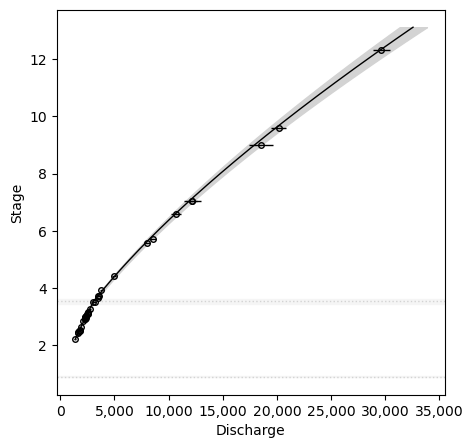

In [8]:
# 3. initialize the model
powerrating = PowerLawRating(q=df['q'],
                             h=df['stage'], 
                             q_sigma=df['q_sigma'],
                             segments=2)
                                   
# 4. fit the model
trace = powerrating.fit()

# 5. visualize the result
powerrating.plot(trace)

On the first run, the previous cell will take a bit longer while the model compiles.
A progress bar will appear when the optimization begins.
The loss with decline as the optimization proceeds and should converge after a few seconds (Average Loss = -51).

The resulting fit can be displayed as a rating table

In [13]:
table = powerrating.table(trace)
table.head()


,stage,discharge,sigma
0,2.20,1366.83,1.0138
1,2.21,1378.89,1.0137
2,2.22,1390.96,1.0137
3,2.23,1403.04,1.0136
4,2.24,1415.13,1.0136


and saved as a CSV

In [14]:
table.to_csv('green_rating_table.csv')

## Demo datasets
The package includes several demo datasets.
List them by calling

In [ ]:
from ratingcurve import data
data.list()

Each dataset includes a description

In [11]:
data.describe('green channel')

# Green River near Jensen, UT (channel control)

## USGS Gage ID: 09261000

## Control
At the gage, the river is restricted to one channel at all stages.
The streambed is very flat and is composed of cobbles.
The banks consist of sand, gravel and cobbles.
Riparian vegetation includes sage brush, willows, greasewood, and tamarisk.
The left bank is not as steep as the right, which slopes up quite abruptly.
Both banks are quite stable and are not subject to overflow except at extremely high stages.
The channel is straight for several hundred yards upstream but bends sharply to the right about 2,000 feet below the station.
Channel control prevails at all but the lowest stages when a rocky riffle 200 feet below the gage becomes effective.
The riffle is quite stable. 

## Stage Ranges
- Reach control: < 3.70 ft
- Channel control: 3.70 to 14 ft


and can be loaded as a pandas 

In [15]:
df = data.load('green channel')
df

,datetime,stage,q,q_sigma
0,2020-05-21 14:13:41 [UTC-07:00],7.04,12199.342,199.172931
1,2020-04-16 14:55:31 [UTC-07:00],4.43,4921.953,95.425619
2,2020-03-04 13:54:10 [UTC-07:00],2.99,2331.665,61.860500
3,2020-03-04 13:16:51 [UTC-07:00],2.94,2289.220,47.886745
4,2020-01-23 11:04:32 [UTC-07:00],2.96,2408.210,99.522964
5,2019-12-17 14:48:54 [UTC-07:00],3.09,2533.894,51.712122
6,2019-11-14 14:28:01 [UTC-07:00],2.46,1643.082,33.532286
7,2019-10-07 12:38:17 [UTC-07:00],2.54,1827.425,45.685625
8,2019-08-29 08:03:05 [UTC-07:00],2.86,2105.019,38.663614
9,2019-07-23 11:43:33 [UTC-07:00],3.53,3173.955,66.393957
